# Zheng et al, 2013

Jing Zheng, Su-ping Peng, Ming-chu Liu, Zhe Liang. A novel seismic wavelet estimation method. Journal of Applied Geophysics 90 (2013) 92–95. http://dx.doi.org/10.1016/j.jappgeo.2013.01.007

The authors express the algorithm for a 'single wavelet estimation' like this:

1. Apply an S transform to the seismic data;
2. Get the position of the maximum amplitude in S transform domain as the delay estimation τ^1 and the coarse main frequency estimation ^f s1;
3. Design a filter in the S transform domain with the center point is (τ^1, ^f s1);
4. Apply an inverse S transform to the filtered data which is the output of step 3 and get the data in time domain;
5. Apply FFT to the time domain data;
6. Search the maximum value of the output, and make record of the position as the accurate main frequency estimation ^f ;
7. Reconstruct the Ricker wavelet according to Eq. (1)
8. Estimate the amplitude of the seismic wavelet

We'll leave the multi-component thing alone for now.

## Make data

The authors use isolated reflectors, a Ricker wavelet of 20 Hz, 30 Hz and maybe 40 Hz (the text and figures are not totally consistent), and Gaussian noise at various SNR values measures in dB.

The only tricky part here is computing the correct amount of noise... 

In [53]:
import bruges as bg

dt = 0.001

w, t = bg.filters.ricker(duration=0.128, dt=dt, f=20)

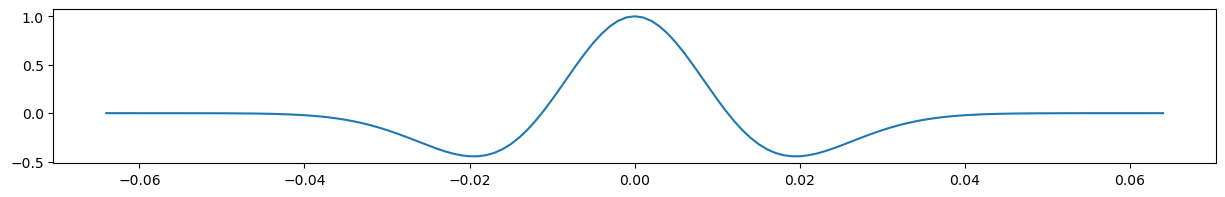

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 2))
plt.plot(t, w)

In [54]:
import numpy as np

# Make the time series in Figure 4.

N = int(0.2 / dt) + 1
r = np.zeros(shape=N)

pos = int(0.05 / dt) + 1
r[pos] = 1

In [56]:
rng = np.random.default_rng(42)
n = rng.normal(loc=0.0, scale=0.25, size=r.size)  # scale is SD, not variance

In [57]:
s = np.convolve(r, w, mode='same') + n

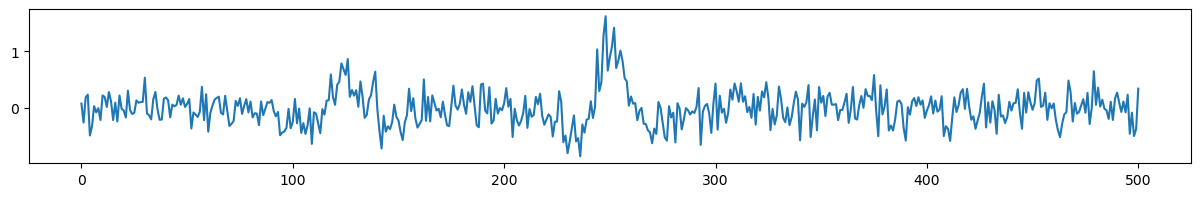

In [58]:
plt.figure(figsize=(15, 2))
plt.plot(s)

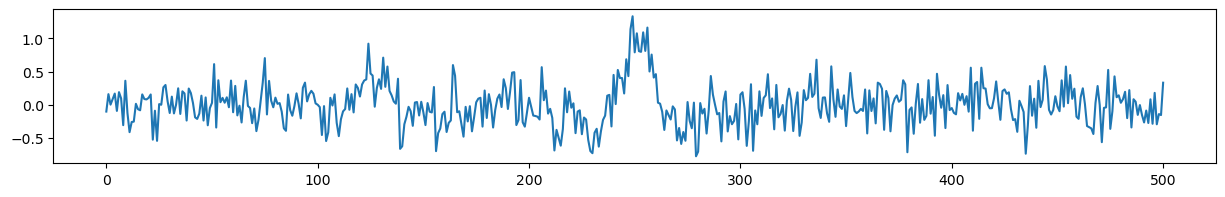

In [66]:
# And in Figure 5.
# Make the time series in Figure 4.

N = int(0.5 / dt) + 1
r = np.zeros(shape=N)

pos1 = int(0.125 / dt) + 1
r[pos1] = 0.5

pos2 = int(0.25 / dt) + 1
r[pos2] = 1

n = rng.normal(loc=0.0, scale=0.25, size=r.size)  # scale is SD, not variance
s_ = np.convolve(r, w, mode='same')
s = s_ + n

plt.figure(figsize=(15, 2))
plt.plot(s)

## Algorithm

### 1. Apply an S-transform

We can try using [the `stockwell`package](https://github.com/claudiodsf/stockwell) for the S-transform.

In [77]:
from stockwell import st

t = np.linspace(0, 0.5, s.size)

fmin = 0   # Hz
fmax = 50  # Hz
df = 1. / (t[-1] - t[0])  # Sampling step in frequency domain (Hz).
fmin_samples = int(fmin / df)
fmax_samples = int(fmax / df)
stock = st.st(s, fmin_samples, fmax_samples)

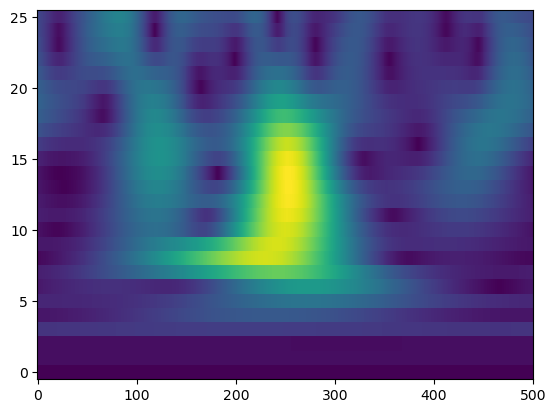

In [85]:
plt.imshow(np.abs(stock), aspect='auto', origin='lower', interpolation='none')

### 2a.  Get the position (time, freq) of the maximum amplitude

In [96]:
max_sample = np.argmax(np.abs(stock))

t_max = dt * (max_sample % t.size)
f_max = df * (max_sample // t.size)

f_max

28.0

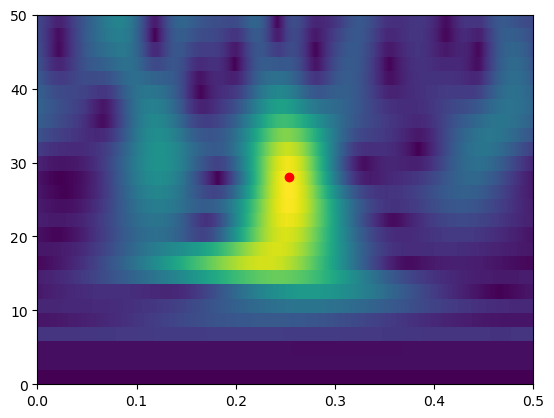

In [98]:
plt.imshow(np.abs(stock), aspect='auto', origin='lower', interpolation='none', extent=[t[0], t[-1], fmin,fmax])
plt.plot(t_max, f_max, 'ro')

### Design a filter in the S transform domain

Not sure what this means... what shape? Gaussian? Then how wide?